In [26]:
import os
import re
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import plotly as px
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
plt.style.use('default')
pd.set_option('display.max_columns', None)

In [37]:
direccion='../catalogAnony/limpieza'

In [55]:
dd=pd.DataFrame()
for path, subdirs, files in os.walk(direccion):
        for name in tqdm(files):
            if(len(name)<21):
                print(name)
                print(len(name))
            
                df=pd.read_csv(os.path.join(path, name))
                df["Hora"]=pd.to_datetime(df["Hora"],dayfirst=True)
                df = df.set_index('Hora')
                ix=df.index.values-3
                flag=df.isna().sum()/len(df)>0.05
                print("Se eliminarion los usuarios")
                print(df.columns[flag])
                imputer = KNNImputer(n_neighbors=6)
                df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
                df['index']=ix
                dff = df.set_index('index')
                df=pd.melt(df, id_vars=['index'], var_name='NIS', value_name='KWh')
                df["cat"]=name[-7:-4]
                
                dd = pd.concat([dd, df],axis=0)
                  #df["Hora"] 

 25%|██▌       | 1/4 [00:00<00:00,  8.81it/s]

Metropolitano141.csv
20
Se eliminarion los usuarios
Index([], dtype='object')
Metropolitano142.csv
20
Se eliminarion los usuarios
Index([], dtype='object')


100%|██████████| 4/4 [00:00<00:00, 12.21it/s]


Metropolitano245.csv
20
Se eliminarion los usuarios
Index([], dtype='object')
Metropolitano343.csv
20
Se eliminarion los usuarios
Index([], dtype='object')


100%|██████████| 1/1 [00:00<00:00, 999.60it/s]


In [56]:
 dd.head()

,index,NIS,KWh,cat
0,2022-01-07 02:59:59.999999997,47,0.226,141
1,2022-01-07 03:59:59.999999997,47,0.224,141
2,2022-01-07 04:59:59.999999997,47,0.220,141
3,2022-01-07 05:59:59.999999997,47,0.202,141
4,2022-01-07 06:59:59.999999997,47,0.124,141


In [59]:

dd['hour'] = dd['index'].apply(lambda x: x.hour)

In [60]:
dd.head()

,index,NIS,KWh,cat,hour
0,2022-01-07 02:59:59.999999997,47,0.226,141,2
1,2022-01-07 03:59:59.999999997,47,0.224,141,3
2,2022-01-07 04:59:59.999999997,47,0.220,141,4
3,2022-01-07 05:59:59.999999997,47,0.202,141,5
4,2022-01-07 06:59:59.999999997,47,0.124,141,6


<AxesSubplot:xlabel='hour'>

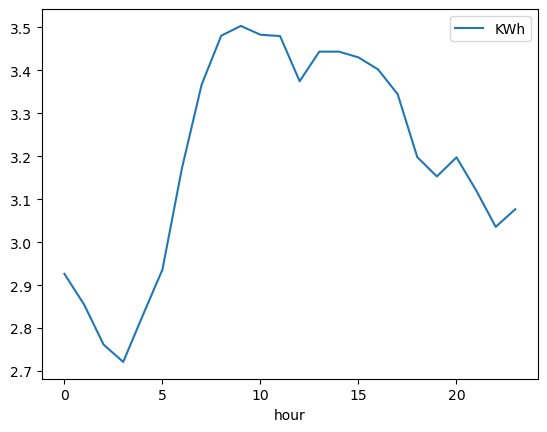

In [62]:
dd.groupby('hour').mean().plot()

In [63]:
dd.head()

,index,NIS,KWh,cat,hour
0,2022-01-07 02:59:59.999999997,47,0.226,141,2
1,2022-01-07 03:59:59.999999997,47,0.224,141,3
2,2022-01-07 04:59:59.999999997,47,0.220,141,4
3,2022-01-07 05:59:59.999999997,47,0.202,141,5
4,2022-01-07 06:59:59.999999997,47,0.124,141,6


141
142
245
343


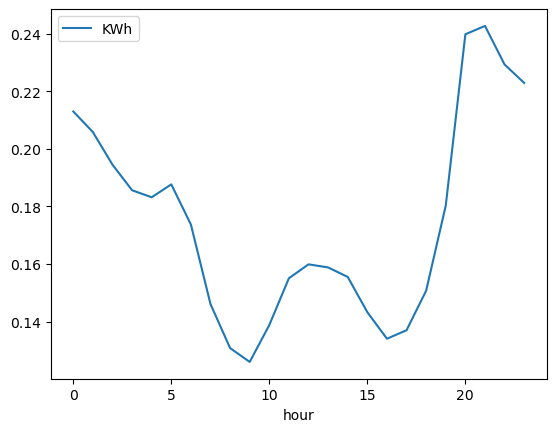

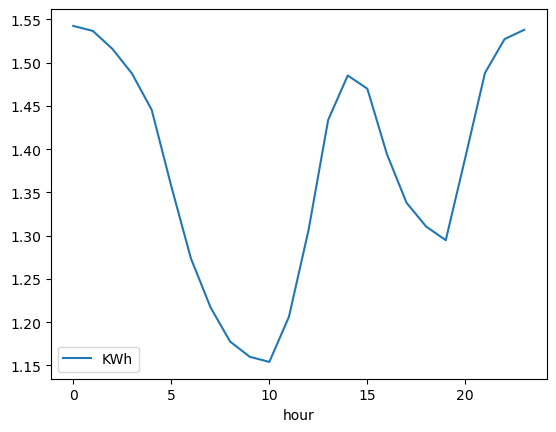

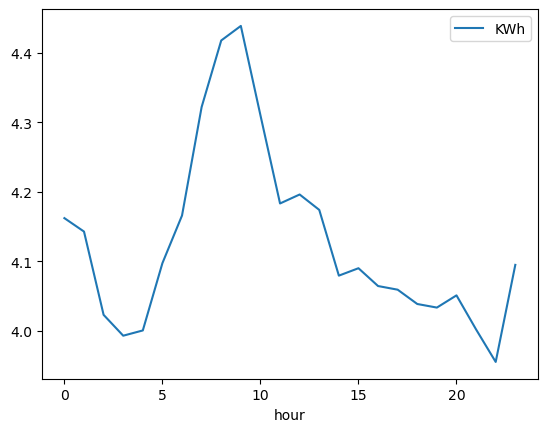

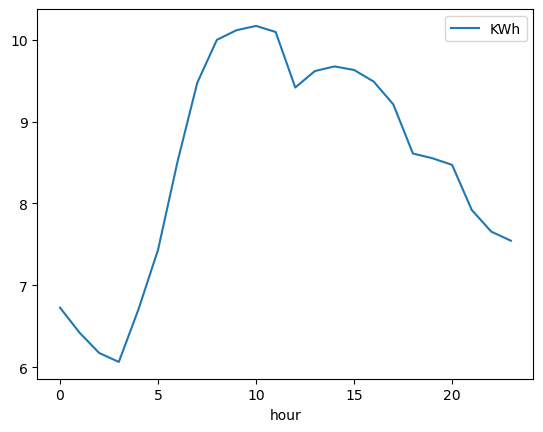

In [65]:
for cat in np.unique(dd.cat):
    dd[dd.cat == cat].groupby('hour').mean().plot()
    print(cat)

In [66]:
def multiline_hourly_plot(dataset, avg = None, ycol = 'KWh', ymin = None, ymax = None, opacity = None, title = None,fig=None,ax=None):
    if(fig==None and ax==None):
        fig, ax = plt.subplots()
    
    if ymin is not None:
        ax.set_ylim(bottom = ymin)
    
    if ymax is not None:
        ax.set_ylim(top = ymax)
        
    if opacity is None:
        opacity = 0.01

    for key, group in dataset:
        ax = group.groupby('hour').mean().plot(ax = ax, y = ycol, color = '#000000', alpha = opacity)
    
    if avg is not None:
        ax = avg.groupby('hour').mean().plot(ax = ax, y = ycol, color = '#FF0000', alpha = 1, linewidth = 2)
        
    if title is not None:
        ax.set_title(title)

    ax.legend().set_visible(False) # Disable the plot legend
    plt.show()

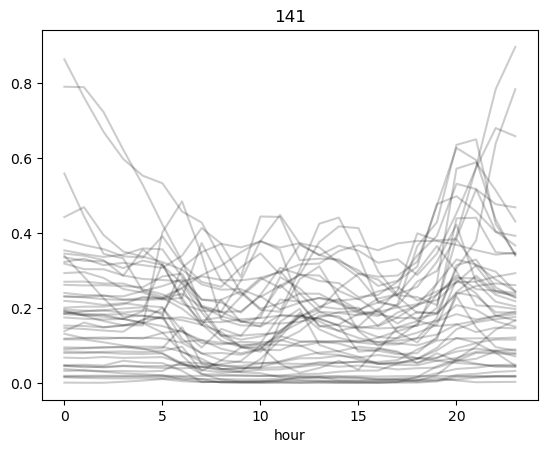

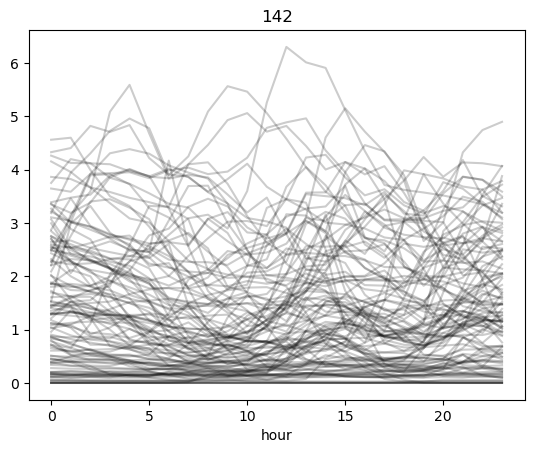

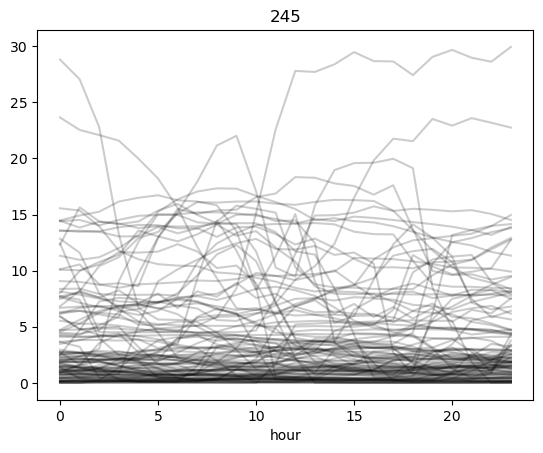

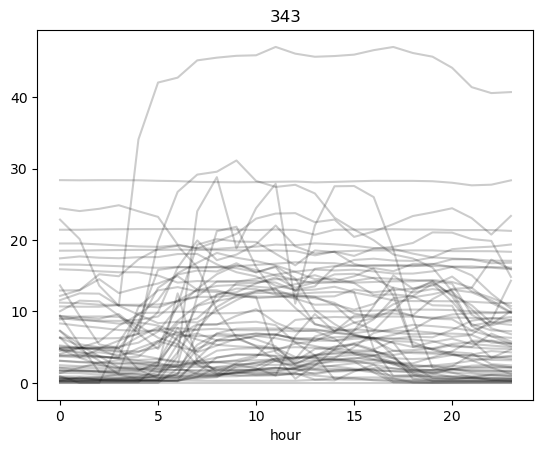

In [67]:
for cat in np.unique(dd.cat):
    multiline_hourly_plot(dd[dd.cat == cat].groupby('NIS'),opacity =0.2,title=cat)

In [68]:
dd['day'] = dd['index'].apply(lambda x: x.dayofweek)

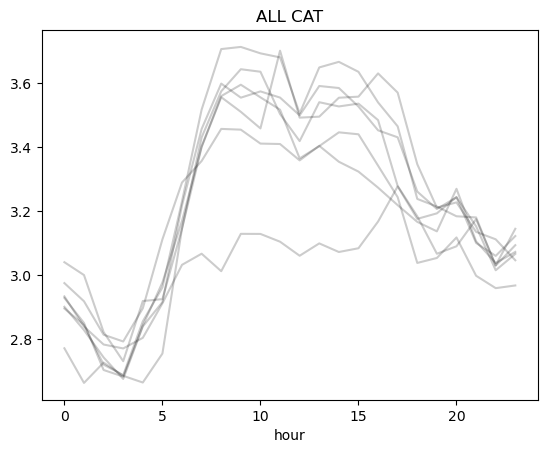

In [70]:
multiline_hourly_plot(dd.groupby('day'),opacity =0.2,title='ALL CAT')

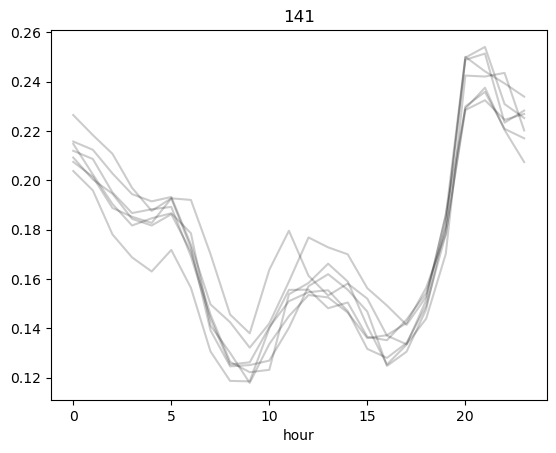

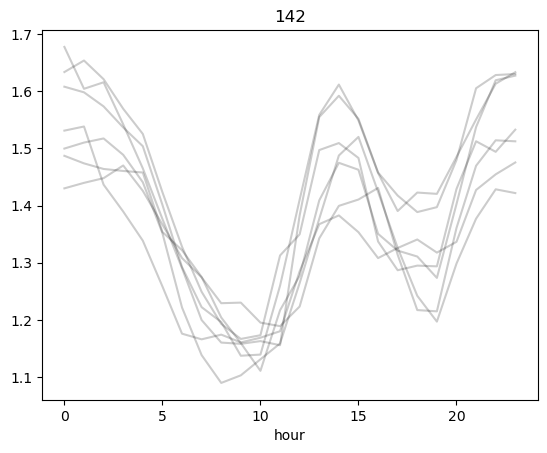

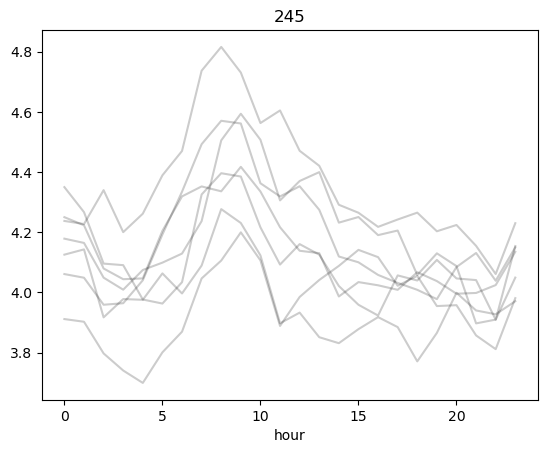

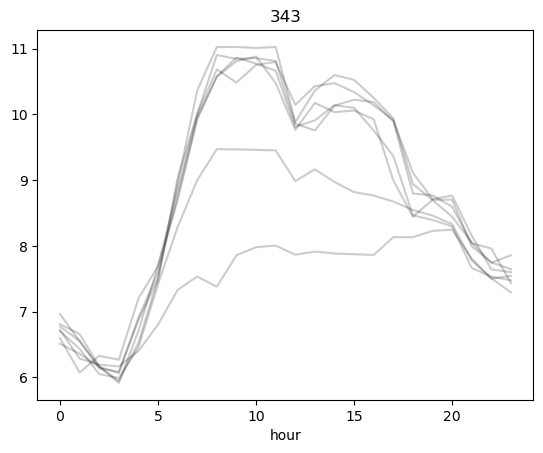

In [71]:
for cat in np.unique(dd.cat):
    multiline_hourly_plot(dd[dd.cat == cat].groupby('day'),opacity =0.2,title=cat)


In [48]:
dg=dd[dd.cat == cat].groupby('day')